## Information about this notebook

This example script was provided as part of the Data Management Project (INF) within the TR-172 ["ArctiC Amplification: Climate Relevant Atmospheric and SurfaCe Processes, and Feedback Mechanisms" (AC)³](http://www.ac3-tr.de/) funded by the German Research Foundation (Deutsche Forschungsgemeinschaft, DFG)

Author: Matthias Buschmann, [Institute of Environmental Physics](http://www.iup.uni-bremen.de), University of Bremen, Germany, m_buschmann@iup.physik.uni-bremen.de

Github repository: https://github.com/ac3-tr/ac3-notebooks

**Setup instructions for a reference Python Environment can be found on the [Github page](https://github.com/ac3-tr/ac3-notebooks)**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import cartopy.crs as ccrs
import os
from netCDF4 import Dataset
%matplotlib inline

# TCCON data from Ny Ålesund


## Dataset resources

**Title:** TCCON data from Ny Ålesund, Spitsbergen (NO), Release GGG2014.R0    

**Author** Notholt, J.; Warneke, T.; Petri, C; Deutscher, N. M.; Weinzierl, C; Palm, M; Buschmann, M.

**Year** 2019

**Institute** Institute of Environmental Physics, University of Bremen, Bremen (DE)

**Data hosted by** [Caltech](https://data.caltech.edu)

**DOI** [10.14291/tccon.ggg2014.nyalesund01.r0/1149278](https://doi.org/10.14291/tccon.ggg2014.nyalesund01.r0/1149278)

**License**    [TCCON Data Use Policy](https://data.caltech.edu/tindfiles/serve/90348ea4-f340-4f43-8db2-b9beb7845519/)


## Abstract
The Total Carbon Column Observing Network (TCCON) is a network of ground-based Fourier Transform Spectrometers that record direct solar absorption spectra of the atmosphere in the near-infrared. From these spectra, accurate and precise column-averaged abundances of atmospheric constituents including CO2, CH4, N2O, HF, CO, H2O, and HDO, are retrieved. This data set contains observations from the TCCON station Ny Ålesund, Spitsbergen, Norway.

## Reading example dataset

The dataset can be downloaded via the link above and saved in the current working directory of this notebook. The NetCDF file can be opened and read with pyNetCDF.

In [2]:
datafolder = '../ac3/INF/pangaea_download/'
fname = '/home/matthias/ac3e02/data/sp20060328_20170831.public.nc'
#fname = '/home/matthias/tccon_data/tccon.latest.public/br20070115_20160927.public.nc'

data = Dataset(os.path.join(datafolder, fname), "r", format="NETCDF4")
tccon_co2 = data.variables['xco2_ppm'][:]
tccon_co2_error = data.variables['xco2_ppm_error'][:]
tccon_ch4 = data.variables['xch4_ppm'][:]
tccon_ch4_error = data.variables['xch4_ppm_error'][:]
tccon_hf = data.variables['xhf_ppt'][:]
tccon_n2o = data.variables['xn2o_ppb'][:]
tccon_co = data.variables['xco_ppb'][:]
yeardayhour = zip(data.variables['year'][:], data.variables['day'][:], data.variables['hour'][:])
Ttccon = np.array([dt.datetime(i,1,1)+dt.timedelta(days=int(j)-1, hours=float(k)) for i,j,k in yeardayhour])
tccon_h2o = data.variables['xh2o_ppm'][:]
tccon_hdo = data.variables['xhdo_ppm'][:]
data.close()


## Overview plot

As an overview, the data fields can be plotted against time.

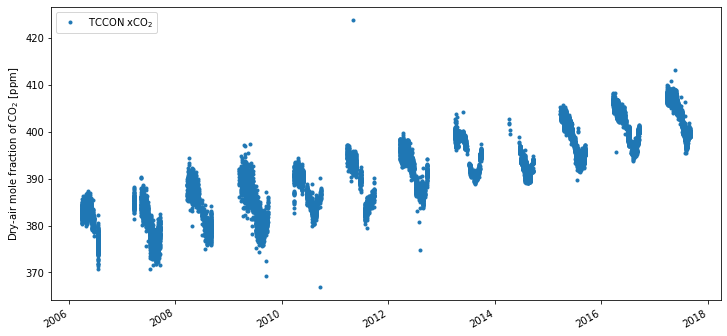

In [3]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Dry-air mole fraction of CO$_2$ [ppm]')
ax.plot(Ttccon, tccon_co2, '.', label='TCCON xCO$_2$')
ax.legend(loc='upper left')
fig.autofmt_xdate()

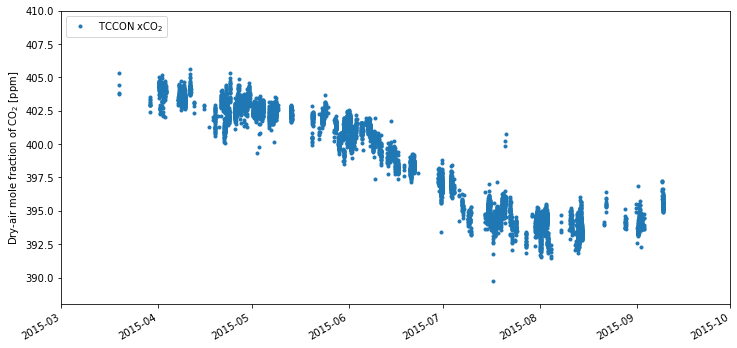

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Dry-air mole fraction of CO$_2$ [ppm]')
ax.set_xlim(dt.datetime(2015,3,1), dt.datetime(2015,10,1))
ax.set_ylim(388,410)
ax.plot(Ttccon, tccon_co2, '.', label='TCCON xCO$_2$')
ax.legend(loc='upper left')
fig.autofmt_xdate()

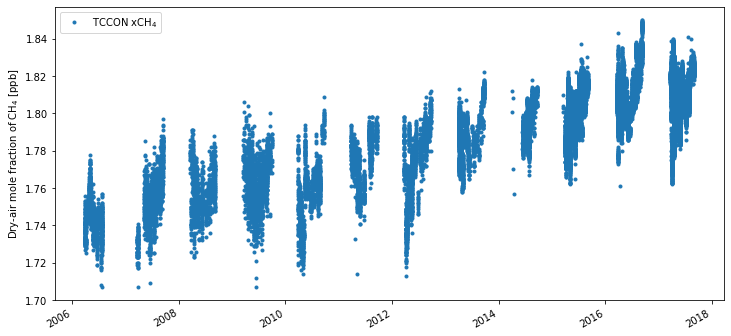

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Dry-air mole fraction of CH$_4$ [ppb]')
ax.plot(Ttccon, tccon_ch4, '.', label='TCCON xCH$_4$')
ax.legend(loc='upper left')
fig.autofmt_xdate()

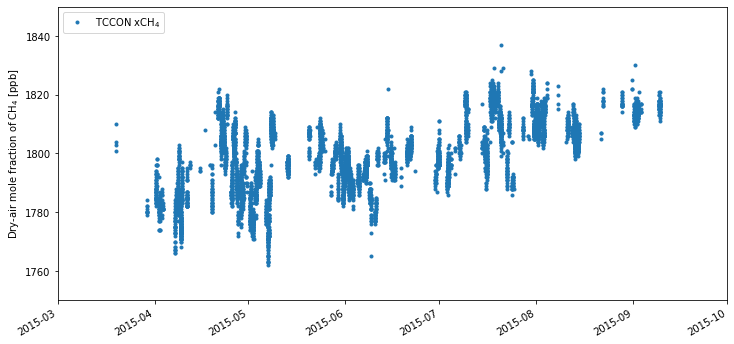

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Dry-air mole fraction of CH$_4$ [ppb]')
ax.set_xlim(dt.datetime(2015,3,1), dt.datetime(2015,10,1))
ax.set_ylim(1750,1850)
ax.plot(Ttccon, tccon_ch4*1e3, '.', label='TCCON xCH$_4$')
ax.legend(loc='upper left')
fig.autofmt_xdate()